In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

from sklearn.preprocessing import MinMaxScaler
from sklearn import mixture
from sklearn import metrics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (confusion_matrix, precision_score, recall_score)

from sklearn.impute import SimpleImputer
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()

In [2]:
#read in 2015-2022 datasets, add year column, add rank to years that don't have rank, clean column names 
df_15 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2015.csv')
df_15["Year"] = 2015
df_15.rename(columns = {'Family':'Social support'}, inplace = True)

df_16 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2016.csv')
df_16["Year"] = 2016
df_16.rename(columns = {'Family':'Social support'}, inplace = True)

df_17 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2017.csv')
df_17["Year"] = 2017
df_17. rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score',
                         'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                         'Health..Life.Expectancy.':'Health (Life Expectancy)',
                         'Trust..Government.Corruption.':'Trust (Government Corruption)',
                        'Dystopia.Residual':'Dystopia Residual',
                        'Family':'Social support'}, inplace = True)

df_18 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2018.csv')
df_18["Year"] = 2018
df_18. rename(columns = {'Overall rank':'Happiness Rank', 'Score':'Happiness Score',
                         'Country or region':'Country',
                         'GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)

df_19 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2019.csv')
df_19["Year"] = 2019
df_19. rename(columns = {'Overall rank':'Happiness Rank', 'Score':'Happiness Score',
                         'Country or region':'Country',
                         'GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)

df_20 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2020.csv')
df_20["Year"] = 2020
df_20.rename(columns = {'Ladder score':'Happiness Score',
                         'Country name':'Country',
                         'Logged GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                       'Dystopia + residual':'Dystopia Residual'}, inplace = True)
df_20['Happiness Rank'] = df_20['Happiness Score'].rank(ascending=False)

df_21 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2021.csv')
df_21["Year"] = 2021
df_21.rename(columns = {'Ladder score':'Happiness Score',
                         'Country name':'Country',
                         'Logged GDP per capita':'Economy (GDP per Capita)',
                         'Healthy life expectancy':'Health (Life Expectancy)',
                         'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)',
                       'Dystopia + residual':'Dystopia Residual'}, inplace = True)
df_21['Happiness Rank'] = df_21['Happiness Score'].rank(ascending=False)


df_22 = pd.read_csv('https://raw.githubusercontent.com/cklostermann/STAT-451-project/main/2022.csv')
df_22["Year"] = 2022

In [3]:
#merge datasets
df = pd.concat([df_15, df_16, df_17, df_18, df_19])

list(df.columns) #will have to clean up column names so that they can merge properly
df = df.iloc[:, 0:13]
df = df.drop(['Region','Standard Error'], 1)

In [4]:
#rescale happiness scores
X = df["Happiness Score"].values.reshape(-1, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # do scaling
df["Happiness Score"] = X_scaled

In [5]:
#add column to categorize happiness scores as low, medium, and high
df["Score Category"] = pd.cut(df["Happiness Score"], bins=[0, .5, 1.0], 
                              right=False, labels=['low', 'high'])

#remove rows with NA values
df = df.dropna()

The equation of the multiple variable linear regression model is: 
Happiness Score = 40.5 + (0.222)*GDP per Capita + (0.149)*Social support + (0.201)*Health (Life Expectancy)+ (0.284)*Freedom + (0.156)*Trust (Government Corruption) + (0.0884)*Generosity + (-0.0201)*Year 
The linear regression model score is 0.767.


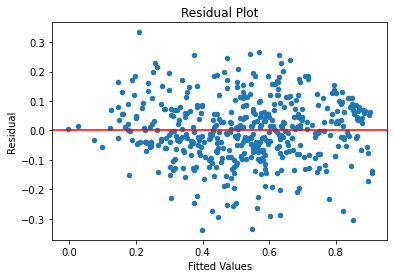

In [6]:
#Linear Regression model
cols=["Economy (GDP per Capita)", "Social support", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity", "Year"]
X = np.array(df[cols])
y = np.array(df[['Happiness Score']]).ravel()

lm_model = LinearRegression()
lm_model.fit(X,y)
y_hat = lm_model.predict(X)
b = lm_model.intercept_
w = lm_model.coef_
print(f"The equation of the multiple variable linear regression model is: \nHappiness Score = {lm_model.intercept_:.3} + ({lm_model.coef_[0]:.3})*GDP per Capita + ({lm_model.coef_[1]:.3})*Social support + ({lm_model.coef_[2]:.3})*Health (Life Expectancy)+ ({lm_model.coef_[3]:.3})*Freedom + ({lm_model.coef_[4]:.3})*Trust (Government Corruption) + ({lm_model.coef_[5]:.3})*Generosity + ({lm_model.coef_[6]:.3})*Year ")
print(f"The linear regression model score is {lm_model.score(X, y):.3}.")
#make a residual plot
residuals = y-y_hat
s = pd.Series(y_hat, residuals)
df1 = s.to_frame()

df1.reset_index(inplace=True)

df1.columns = ['Residual', "y_hat"]
df1
df1.plot(kind='scatter',x='y_hat',y='Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.show()

The model is P(Score Category = 'high' | x) = f(x) = 1 / (1 + exp(-(4.85 *x + -4.45))).
Training accuracy = 0.804, test accuracy = 0.788.


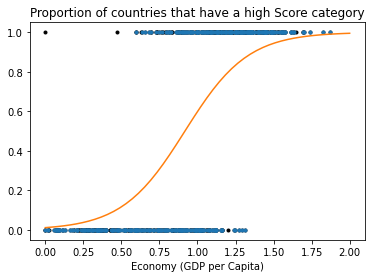

In [7]:
#Logistic Regression
df1 = df.copy()
df1 = df1[[ 'Economy (GDP per Capita)', 'Score Category']]

X = df1['Economy (GDP per Capita)'].to_numpy()
nrows = X.shape[0]
X.shape = (nrows, 1)
y = (df1['Score Category'] == 'high').to_numpy().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = linear_model.LogisticRegression().fit(X_train, y_train)

model.fit(X, y)
plt.plot(X, y, '.', color='black')
plt.plot(X_train,y_train, '.')


plt.xlabel('Economy (GDP per Capita)')
plt.title('Proportion of countries that have a high Score category')

low = 0.0
high = 2.0
margin = 0.1

b = model.intercept_
w = model.coef_[0]
xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot)

b_1 = float(b)
w_1 = float(w)

x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[X[:, 0] == x_values[i]]) / x_counts[i]

probs = model.predict_proba(X)[:, 0] 

train_a = model.score(X_train, y_train)

test_a = model.score(X_test, y_test)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)


print(f'The model is P(Score Category = \'high\' | x) = f(x) = 1 / (1 + exp(-({w_1:.3} *x + {b_1:.3}))).')
print(f'Training accuracy = {train_a:.3}, test accuracy = {test_a:.3}.')

In [8]:
#split dataset into 75% training and 25% testing data
X = np.array(df[['Social support', 'Health (Life Expectancy)']])
y = np.array(df[['Score Category']]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0, stratify=y)

In [9]:
#knn classifier
classifier = KNeighborsClassifier()
parameters = {'metric':['euclidean'], 'n_neighbors':[1, 3, 5, 7, 9, 11, 13]}
clf = GridSearchCV(classifier, parameters)
clf.fit(X, y)
print(f'clf.best_score_={clf.best_score_:.3}, ' +
      f'clf.best_params_={clf.best_params_}')
            
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Training accuracy is {metrics.accuracy_score(y_train, knn.predict(X_train))}')
print(f'Test accuracy is {metrics.accuracy_score(y_test, y_pred)}')

clf.best_score_=0.791, clf.best_params_={'metric': 'euclidean', 'n_neighbors': 9}
Training accuracy is 0.8210227272727273
Test accuracy is 0.864406779661017


In [10]:
#predict happiness of country with social support and health scores similar to U.S.

#find average scores for U.S.
usa = df[df["Country"]=="United States"]
us_avg_social = statistics.mean(usa['Social support'])
us_avg_health = statistics.mean(usa['Health (Life Expectancy)'])

#predict happiness category using knn classifier
new_predictor = np.array([us_avg_social, us_avg_health])
knn.predict(new_predictor.reshape(1,-1))

array(['high'], dtype=object)

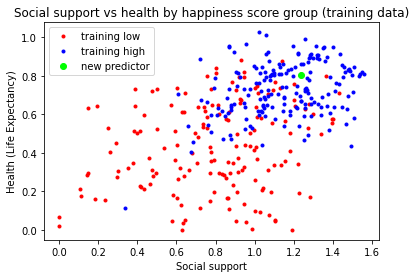

In [11]:
#plot Social support vs health
plt.plot(X_train[y_train == "low", 0], X_train[y_train == "low", 1], '.r', label='training low')
plt.plot(X_train[y_train == "high", 0], X_train[y_train == "high", 1], '.b', label='training high')
plt.plot(us_avg_social, us_avg_health, 'o', color='lime', label='new predictor')
plt.title('Social support vs health by happiness score group (training data)')
plt.xlabel('Social support')
plt.ylabel('Health (Life Expectancy)')
plt.legend()

In [12]:
#confusion matrix for kNN classifier
y_hat = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_hat)
conf = pd.DataFrame(data=conf_mat) # or pd.DataFrame(data=M, index=['0', '1'], columns=['0', '1'])
print(f'df:\n{conf}')

#precision = precision_score(y_true=y, y_pred=y_hat)
#print(f'precision={precision}, recall={recall}')

df:
    0   1
0  56   6
1  10  46


The best model is: DecisionTreeClassifier(criterion='entropy', max_depth=4)
The score of the best model is: 0.888
The score of the test dataset is: 0.862
|--- Economy <= 1.12
|   |--- Health <= 0.44
|   |   |--- Dystopia Residual <= 2.76
|   |   |   |--- class: low
|   |   |--- Dystopia Residual >  2.76
|   |   |   |--- Dystopia Residual <= 2.80
|   |   |   |   |--- class: high
|   |   |   |--- Dystopia Residual >  2.80
|   |   |   |   |--- class: low
|   |--- Health >  0.44
|   |   |--- Dystopia Residual <= 2.15
|   |   |   |--- Social support <= 0.87
|   |   |   |   |--- class: low
|   |   |   |--- Social support >  0.87
|   |   |   |   |--- class: low
|   |   |--- Dystopia Residual >  2.15
|   |   |   |--- Social support <= 0.77
|   |   |   |   |--- class: low
|   |   |   |--- Social support >  0.77
|   |   |   |   |--- class: high
|--- Economy >  1.12
|   |--- Trust <= 0.08
|   |   |--- Dystopia Residual <= 1.57
|   |   |   |--- Social support <= 1.44
|   |   |   |   |--- class: lo

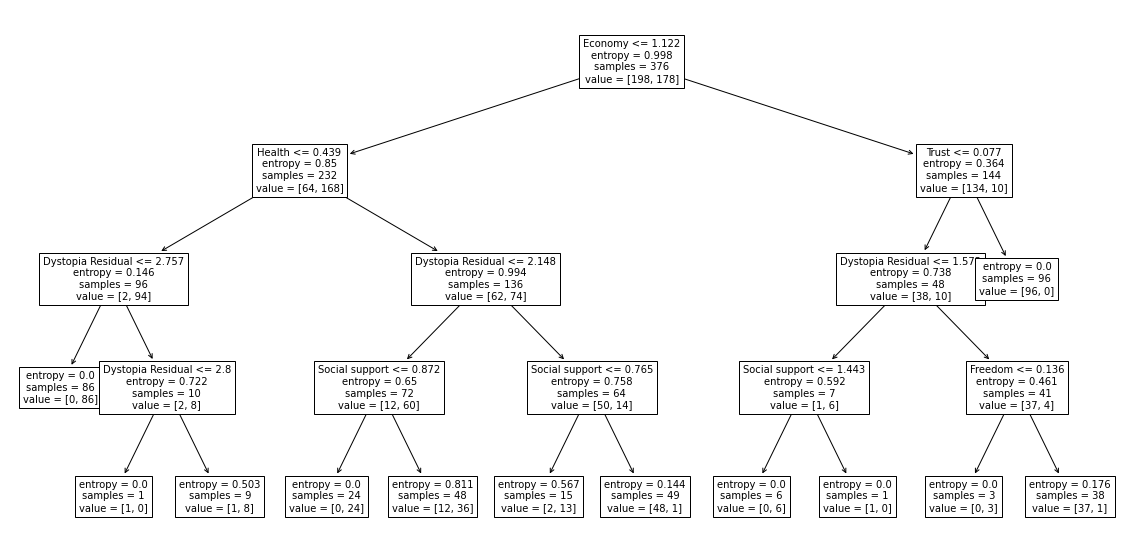

In [13]:
#Decision Tree Classifier

y = df['Score Category'].to_numpy()
X = df[['Economy (GDP per Capita)','Social support','Health (Life Expectancy)','Freedom',
        'Trust (Government Corruption)','Generosity','Dystopia Residual']].to_numpy()

# split 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                  random_state=0, stratify=y)

# setup parameters
parameters = {'criterion':['entropy'], 'max_depth':[1,2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(DecisionTreeClassifier(), parameters)
clf.fit(X_train, y_train)
best_model = clf.best_estimator_

print(f'The best model is: {best_model}')
print(f'The score of the best model is: {clf.best_score_:.3}')
print(f'The score of the test dataset is: {clf.score(X_test, y_test):.3}')

plt.rcParams["figure.figsize"] = (20, 10) # (width, height) https://matplotlib.org/stable/api/figure_api.html
feature_names = ['Economy','Social support','Health','Freedom',
        'Trust','Generosity','Dystopia Residual']
tree.plot_tree(best_model, feature_names=feature_names,fontsize=10)
print(export_text(best_model, feature_names=feature_names))
print('Generosity is not used in this decision tree.')